In [227]:
import pandas as pd
import numpy as np 

results = pd.read_csv("..\\Data\\results_norm.csv")
target = pd.read_csv("..\\Data\\fin_data.csv")
results = results.T
results = results.drop(["Unnamed: 0"])
# results = results.iloc[1:,:]

target.index = target["Date"]

target = target.drop(["Date"], axis=1)
target = target.pct_change()
target = pd.DataFrame(np.log1p(target))
target = target.iloc[1:,:]
target = target.iloc[1000:, 0]

results.index = target.index
results = results*100
target = target*100
display(results)
display(target)

,0,1,2,3,4,5,6,7,8,9,10,11
Date,,,,,,,,,,,,
2006-11-02,-0.581440,-0.581440,-0.581440,-0.604765,-0.604765,-0.604765,0.130131,0.130131,0.130131,-0.614431,-0.614431,0.214054
2006-11-03,-0.151434,-0.151434,-0.151434,-0.126086,-0.126086,-0.126086,-0.911286,-0.911286,-0.911286,-0.093199,-0.093199,0.108904
2006-11-06,-0.254953,-0.254953,-0.254953,-0.211843,-0.211843,-0.211843,2.001664,2.001664,2.001664,-0.203381,-0.203381,-0.626813
2006-11-07,0.983052,0.983052,0.983052,0.984395,0.984395,0.984395,-0.049656,-0.049656,-0.049656,1.058736,1.058736,0.140409
2006-11-08,-0.054737,-0.054737,-0.054737,0.611300,0.611300,0.611300,-0.388748,-0.388748,-0.388748,0.374246,0.374246,0.200941
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.329949,0.500553,0.390729,0.479104,0.422998,0.493292,1.309701,1.316205,1.305665,0.398789,0.409975,-0.616213
2022-12-27,-0.021474,-0.032108,-0.096242,0.042347,0.016587,0.014600,0.303618,0.302806,0.301193,0.055508,0.078065,-0.427598
2022-12-28,-0.571034,-0.664709,-0.337953,-0.622560,-0.642252,-0.366687,-0.247243,-0.246959,-0.250136,-0.511433,-0.264340,0.306221


Date
2006-11-02   -0.034374
2006-11-03   -0.222571
2006-11-06    1.128258
2006-11-07    0.221524
2006-11-08    0.208051
                ...   
2022-12-26    0.000000
2022-12-27   -0.405784
2022-12-28   -1.209347
2022-12-29    1.731063
2022-12-30   -0.254398
Name: ^GSPC, Length: 4217, dtype: float64

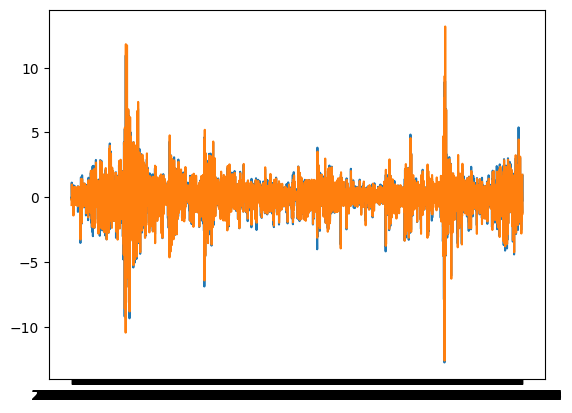

In [228]:
import matplotlib.pyplot as plt
plt.plot(target)
plt.plot(results[4])
plt.show()

In [229]:
from dieboldmariano import dm_test
from ARXT import hit_rate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

def res(target, forecast):
    rmse = sqrt(mean_squared_error(target, forecast))
    hr = hit_rate(target, forecast)
    return(rmse, hr)

In [230]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame that includes a 'Date' column and a 'Performance_Metric' column
# Your list of changepoints
changepoints = [
    "2008-09-19",
    "2010-05-11",
    "2011-08-10",
    "2015-08-27",
    "2018-12-27",
    "2020-03-03",
    "2022-11-11",
]

def summary_splits(df, changepoints):
    # Convert changepoints to datetime
    changepoints = pd.to_datetime(changepoints)

    # Sort the DataFrame by date to ensure correct split calculations
    # df.sort_values(by='Date', inplace=True)

    # Convert the 'Date' column to datetime if it's not already
    df.index = pd.to_datetime(df.index)

    # Initialize the start date for the first split
    start_date = df.index.min()

    # Dictionary to hold the summary statistics for each split
    summary_statistics = {}

    # Iterate over the changepoints to create splits and calculate summary statistics
    for i, cp in enumerate(changepoints, start=1):
        # Create a mask for the current split
        mask = df[(df.index >= start_date) & (df.index < cp)]
        # Calculate summary statistics for the current split
        summary_statistics[f'Split {i}'] = mask.describe()
        # Update the start date for the next split
        start_date = cp

    # The last split goes from the last changepoint to the latest date
    mask = df[(df.index >= start_date)]
    summary_statistics[f'Split {i+1}'] = mask.describe()

    # Convert summary statistics dictionary to a DataFrame for better display and analysis
    summary_stats_df = pd.DataFrame(summary_statistics)
    return summary_stats_df
# Print or output the summary statistics DataFrame
df = target
# df_diff = df.diff()
df_norm=target

summary_stats_norm = summary_splits(df_norm,changepoints)

display(summary_stats_norm)


,Split 1,Split 2,Split 3,Split 4,Split 5,Split 6,Split 7,Split 8
count,491.000000,427.000000,326.000000,1056.000000,870.000000,308.000000,703.000000,36.000000
mean,-0.025556,-0.009261,0.003367,0.047707,0.027625,0.073039,0.035147,-0.083291
std,1.162192,2.243249,1.133606,0.920082,0.836538,0.881522,1.616115,1.126728
min,-4.828803,-9.469512,-6.895837,-4.561860,-4.184254,-4.516814,-12.765220,-2.523748
25%,-0.522106,-0.889802,-0.416068,-0.369670,-0.244963,-0.265525,-0.651748,-0.845870
50%,0.053341,0.112759,0.020118,0.030734,0.020885,0.088199,0.055079,-0.139425
75%,0.568812,0.891517,0.537170,0.506400,0.407070,0.576120,0.819267,0.623876
max,4.242881,10.957197,4.631744,4.525059,4.840318,4.501087,8.968323,3.047864


Normalised Data

In [232]:
# rmse_sample = (sqrt(mean_squared_error(d_val_cumsum, valid_prediction_cumsum)))

res_norm_all = np.zeros((2,results.shape[1]))
dm_res_norm_all = np.zeros((2,results.shape[1]-1))

for i, forecast in enumerate(results):
        rmse, hr = res(target, results.iloc[:,i])
        res_norm_all[0,i] = rmse
        res_norm_all[1,i] = hr
        if i != 11:
            dm_stat, p_value = dm_test(target, results.iloc[:,i], results.iloc[:,11])

            # Store results
            dm_res_norm_all[0,i] = dm_stat
            dm_res_norm_all[1,i] = p_value
    
display(pd.DataFrame(res_norm_all.round(4)))
display(pd.DataFrame(dm_res_norm_all).round(4))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.9061,1.8605,1.9668,1.9318,1.9125,1.8811,1.6140,1.6067,1.6084,1.8943,1.835,1.5482
1,0.3316,0.3340,0.3354,0.3259,0.3245,0.3276,0.5012,0.5012,0.5014,0.3269,0.328,0.4744


,0,1,2,3,4,5,6,7,8,9,10
0,6.1961,6.0121,6.6301,6.6163,6.4272,5.9036,0.9571,0.8644,0.8801,5.9524,5.1966
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3386,0.3874,0.3789,0.0000,0.0000


In [233]:
# can also import from changepoints output file

changepoints = [
    "2008-09-19",
    "2010-05-11",
    "2011-08-10",
    "2015-08-27",
    "2018-12-27",
    "2020-03-03",
    "2022-11-11",
]

lenghts = summary_stats_norm.loc["count",:]
lenghts = pd.concat([pd.Series([0]), lenghts])
lenghts = lenghts.cumsum()
lenghts.index = range(len(lenghts))
lengths = lenghts

In [234]:

res_norm = np.zeros(((len(lengths)-1)*2,results.shape[1]))
dm_res_norm = np.zeros(((len(lengths)-1)*2,results.shape[1]-1))

for i, forecast in enumerate(results):
    for j in range(len(lengths)-1):
        rmse, hr = res(target.iloc[int(lenghts[j]):int(lenghts[j+1])], results.iloc[int(lenghts[j]):int(lenghts[j+1]),i])
        res_norm[2*j,i] = rmse
        res_norm[2*j+1,i] = hr
        if i != 11:
            dm_stat, p_value = dm_test(target.iloc[int(lenghts[j]):int(lenghts[j+1])], results.iloc[int(lenghts[j]):int(lenghts[j+1]),i], results.iloc[int(lenghts[j]):int(lenghts[j+1]),11])

            # Store results
            dm_res_norm[j*2,i] = dm_stat
            dm_res_norm[j*2+1,i] = p_value
    
display(pd.DataFrame(res_norm).round(4))
display(pd.DataFrame(dm_res_norm).round(4))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.8419,1.8419,1.8419,1.7481,1.7481,1.7481,1.3197,1.3197,1.3197,1.7002,1.7002,1.3871
1,0.3306,0.3306,0.3306,0.3184,0.3184,0.3184,0.4939,0.4939,0.4939,0.3163,0.3163,0.5163
2,3.3082,3.2859,3.2980,3.5521,3.3818,3.2985,2.3493,2.3484,2.3474,3.4067,3.1499,2.6533
3,0.3451,0.3357,0.3239,0.3333,0.3357,0.3263,0.5023,0.5023,0.5047,0.3498,0.3239,0.4577
4,1.6849,1.6266,1.7287,1.6894,1.6910,1.6720,1.3621,1.3596,1.3605,1.7146,1.5850,1.3114
5,0.3262,0.3292,0.3354,0.3200,0.3354,0.3108,0.5600,0.5600,0.5600,0.3323,0.3323,0.4462
6,1.3188,1.3081,1.3834,1.3154,1.3124,1.3003,1.8259,1.8014,1.8100,1.3415,1.2665,1.1475
7,0.3261,0.3422,0.3573,0.3280,0.3185,0.3232,0.4701,0.4701,0.4711,0.3223,0.3261,0.4872
8,1.1992,1.1762,1.2383,1.2295,1.1904,1.1757,1.0604,1.0597,1.0586,1.1893,1.1836,1.0529
9,0.3383,0.3268,0.3268,0.3291,0.3257,0.3314,0.5178,0.5178,0.5167,0.3291,0.3245,0.4856


,0,1,2,3,4,5,6,7,8,9,10
0,5.1930,5.1930,5.1930,5.1886,5.1886,5.1886,-1.5581,-1.5581,-1.5581,4.6138,4.6138
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1199,0.1199,0.1199,0.0000,0.0000
2,3.7477,3.6475,3.6085,4.3644,4.0574,3.6553,-2.4769,-2.4853,-2.4954,3.7128,3.1321
3,0.0002,0.0003,0.0003,0.0000,0.0001,0.0003,0.0136,0.0133,0.0130,0.0002,0.0019
4,2.9256,2.5064,3.4853,3.0383,3.0698,2.8904,0.6057,0.5761,0.5860,3.0223,2.4657
5,0.0037,0.0127,0.0006,0.0026,0.0023,0.0041,0.5452,0.5650,0.5583,0.0027,0.0142
6,2.9578,2.7073,3.9243,2.8471,2.8457,2.7052,2.6037,2.5459,2.5514,3.3087,2.1691
7,0.0032,0.0069,0.0001,0.0045,0.0045,0.0069,0.0094,0.0110,0.0109,0.0010,0.0303
8,3.7716,3.3544,4.3772,3.8846,3.5816,3.1894,0.1777,0.1608,0.1359,3.4869,3.3615
9,0.0002,0.0008,0.0000,0.0001,0.0004,0.0015,0.8590,0.8723,0.8920,0.0005,0.0008


In [241]:
# Initialize the array for storing DM statistics and p-values
dm_res_norm_comp = np.zeros(((len(lengths)-1)*2,6))

# Define the pairs for comparison
comparison_pairs = [(0, 2), (1, 2), (3, 5), (4, 5), (6, 8), (7, 8)]

for j in range(len(lenghts) - 1):
    for pair_idx, (col1, col2) in enumerate(comparison_pairs):
        if j == 0:
            dm_stat, p_value = dm_test(
            target,
            results.iloc[:, col1],
            results.iloc[:, col2]
            )
        else:
            dm_stat, p_value = dm_test(
                target.iloc[int(lenghts[j]):int(lenghts[j+1])],
                results.iloc[int(lenghts[j]):int(lenghts[j + 1]), col1],
                results.iloc[int(lenghts[j]):int(lenghts[j + 1]), col2]
            )

        # Store results
        dm_res_norm_comp[(j)*2, pair_idx] = dm_stat
        dm_res_norm_comp[(j)*2+1, pair_idx] = p_value
display(pd.DataFrame(dm_res_norm_comp).round(4))


,0,1,2,3,4,5
0,-2.8205,-4.0649,2.3385,2.3960,5.6240,-1.4343
1,0.0048,0.0000,0.0194,0.0166,0.0000,0.1516
2,0.1654,-0.1815,2.6495,2.1348,3.3238,3.1966
3,0.8687,0.8560,0.0084,0.0333,0.0010,0.0015
4,-1.3159,-2.9289,1.8078,1.5978,2.2817,-2.4587
5,0.1891,0.0036,0.0716,0.1111,0.0232,0.0145
6,-4.6233,-4.8762,1.3037,1.1742,4.6001,-2.1035
7,0.0000,0.0000,0.1926,0.2406,0.0000,0.0357
8,-1.9173,-2.9829,3.0568,1.4909,4.4416,4.4836
9,0.0555,0.0029,0.0023,0.1363,0.0000,0.0000


In [237]:
res_norm = pd.DataFrame(res_norm, columns=results.columns)
dm_res_norm = pd.DataFrame(dm_res_norm)
res_norm_all = pd.DataFrame(res_norm_all, columns=results.columns)
dm_res_norm_all = pd.DataFrame(dm_res_norm_all)
dm_res_norm_comp = pd.DataFrame(dm_res_norm_comp)
res_norm.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained","ARXT_exog", "ARXT_target_retuned", "ARXT_target_retrained", "ARXT_target", "ART_retuned", "ART_retrained", "ART", "ARX_retrained", "ARX", "AR"]
res_norm = res_norm.round(4)
res_norm.index = [f"{i//2}_{'rmse' if i % 2 == 0 else 'hr'}" for i in range(len(res_norm))]
res_norm.to_csv("split_results_norm.csv")

res_norm_all.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained","ARXT_exog", "ARXT_target_retuned", "ARXT_target_retrained", "ARXT_target", "ART_retuned", "ART_retrained", "ART", "ARX_retrained", "ARX", "AR"]
res_norm_all = res_norm_all.round(4)
res_norm_all.index = [f"{i//2}_{'rmse' if i % 2 == 0 else 'hr'}" for i in range(len(res_norm_all))]
res_norm_all.to_csv("split_results_norm_all.csv")

dm_res_norm.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained","ARXT_exog", "ARXT_target_retuned", "ARXT_target_retrained", "ARXT_target", "ART_retuned", "ART_retrained", "ART", "ARX_retrained", "ARX"]
dm_res_norm = dm_res_norm.round(4)
dm_res_norm.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_norm))]
dm_res_norm.to_csv("split_results_norm_db.csv")

dm_res_norm_all.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained","ARXT_exog", "ARXT_target_retuned", "ARXT_target_retrained", "ARXT_target", "ART_retuned", "ART_retrained", "ART", "ARX_retrained", "ARX"]
dm_res_norm_all = dm_res_norm_all.round(4)
dm_res_norm_all.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_norm_all))]
dm_res_norm_all.to_csv("split_results_norm_db_all.csv")

dm_res_norm_comp.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained", "ART_retuned", "ART_retrained"]
dm_res_norm_comp = dm_res_norm_comp.round(4)
dm_res_norm_comp.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_diff_comp))]
dm_res_norm_comp.to_csv("split_results_norm_db_comp.csv")

Differenced

In [256]:
results = pd.read_csv("..\\Data\\results_diff.csv")
target = pd.read_csv("..\\Data\\fin_data.csv")
results = results.T
results = results.drop(["Unnamed: 0"])
target.index = target["Date"]
target = target.drop(["Date"], axis=1)
target = target.pct_change()
target = target.diff()
target = target.iloc[2:,:]
target = target.iloc[1000:, 0]

target = target*100
results = results*100

results.index = target.index

display(results)
display(target)

,0,1,2,3,4,5,6,7,8,9,10,11
Date,,,,,,,,,,,,
2006-11-03,0.616548,0.616548,0.616548,0.626824,0.626824,0.626824,-1.020376,-1.020376,-1.020376,0.581296,0.581296,-0.369407
2006-11-06,1.170094,1.170094,1.170094,-0.114566,-0.114566,-0.114566,2.649999,2.649999,2.649999,-0.219913,-0.219913,-0.688951
2006-11-07,1.231050,1.231050,1.231050,1.231494,1.231494,1.231494,-1.897681,-1.897681,-1.897681,1.255411,1.255411,-0.336338
2006-11-08,-0.796082,-0.796082,-0.796082,-0.764777,-0.764777,-0.764777,-0.188367,-0.188367,-0.188367,-0.753606,-0.753606,0.801050
2006-11-09,-0.028232,-0.028232,-0.028232,-0.039064,-0.039064,-0.039064,0.191519,0.191519,0.191519,-0.032847,-0.032847,0.868435
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.958016,1.967354,1.931092,1.308818,1.885380,1.903578,1.207031,1.309719,1.285439,1.773164,1.748835,0.528431
2022-12-27,-0.524162,-0.528817,-0.610848,-0.564116,-0.532404,-0.570506,-0.940590,-0.951745,-0.942400,-0.513047,-0.555879,0.434965
2022-12-28,-0.612531,-0.617263,-0.346474,-0.585187,-0.506803,-0.327165,-0.496185,-0.500440,-0.496920,-0.488067,-0.295788,1.080720


Date
2006-11-03   -0.187955
2006-11-06    1.356970
2006-11-07   -0.912876
2006-11-08   -0.013502
2006-11-09   -0.741565
                ...   
2022-12-26   -0.586810
2022-12-27   -0.404962
2022-12-28   -0.797102
2022-12-29    2.948197
2022-12-30   -2.000207
Name: ^GSPC, Length: 4216, dtype: float64

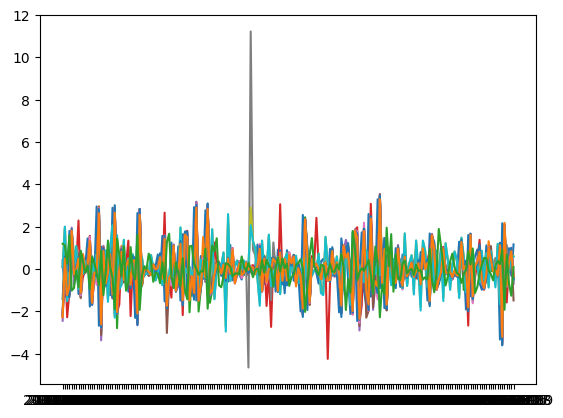

In [209]:
plt.plot(target[1000:1200])
plt.plot(results[1000:1200])

In [257]:
summary_stats_diff = summary_splits(target*100,changepoints)

display(summary_stats_diff)


,Split 1,Split 2,Split 3,Split 4,Split 5,Split 6,Split 7,Split 8
count,490.000000,427.000000,326.000000,1056.000000,870.000000,308.000000,703.000000,36.000000
mean,0.891540,0.014809,0.105298,-0.079290,0.121378,-0.115406,0.133645,-16.104230
std,179.411047,335.351238,167.267873,132.271117,118.469514,122.476612,253.669031,177.087005
min,-666.967361,-1211.225063,-660.595465,-915.592521,-492.838787,-444.244412,-2127.118021,-461.937376
25%,-91.742953,-141.267957,-85.128993,-68.601205,-54.723721,-67.099965,-100.703023,-149.438073
50%,-7.390402,-11.695155,-1.744230,-5.271462,-4.027989,-8.825780,-3.964327,-21.883247
75%,98.564907,139.177447,80.129472,68.972836,49.683250,58.591006,100.226493,128.485991
max,904.824814,1422.424328,1140.413123,904.424254,584.201454,590.924450,1879.839307,325.397377


In [258]:

res_diff_all = np.zeros((2,results.shape[1]))
dm_res_diff_all = np.zeros((2,results.shape[1]-1))

for i, forecast in enumerate(results):
        rmse, hr = res(target, results.iloc[:,i])
        res_diff_all[0,i] = rmse
        res_diff_all[1,i] = hr
        if i != 11:
            dm_stat, p_value = dm_test(target, results.iloc[:,i], results.iloc[:,11])

            # Store results
            dm_res_diff_all[0,i] = dm_stat
            dm_res_diff_all[1,i] = p_value
    
    
display(pd.DataFrame(res_diff_all).round(2))
display(pd.DataFrame(dm_res_diff_all).round(4))

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.33,3.34,3.41,3.35,3.41,3.38,2.45,2.32,2.33,3.33,3.27,1.88
1,0.27,0.27,0.26,0.27,0.27,0.26,0.50,0.50,0.50,0.26,0.26,0.67


,0,1,2,3,4,5,6,7,8,9,10
0,11.2333,10.371,11.2986,10.9234,11.1096,10.6927,3.7221,3.7439,3.8133,10.6895,10.5287
1,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0002,0.0001,0.0000,0.0000


In [217]:
res_diff = np.zeros(((len(lengths)-1)*2,results.shape[1]))
dm_res_diff = np.zeros(((len(lengths)-1)*2,results.shape[1]-1))

for i, forecast in enumerate(results):
    for j in range(len(lengths)-1):
        rmse, hr = res(target.iloc[int(lenghts[j]):int(lenghts[j+1])], results.iloc[int(lenghts[j]):int(lenghts[j+1]),i])
        res_diff[2*j,i] = rmse
        res_diff[2*j+1,i] = hr
        if i != 11:
            dm_stat, p_value = dm_test(target.iloc[int(lenghts[j]):int(lenghts[j+1])], results.iloc[int(lenghts[j]):int(lenghts[j+1]),i], results.iloc[int(lenghts[j]):int(lenghts[j+1]),11])

            # Store results
            dm_res_diff[j*2,i] = dm_stat
            dm_res_diff[j*2+1,i] = p_value
    
display(pd.DataFrame(res_diff).round(4))
display(pd.DataFrame(dm_res_diff).round(4))

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.2299,3.2299,3.2299,3.1837,3.1837,3.1837,1.9788,1.9788,1.9788,3.0608,3.0569,1.7509
1,0.2837,0.2837,0.2837,0.2755,0.2755,0.2755,0.5041,0.5041,0.5041,0.2796,0.2796,0.7041
2,5.7925,5.7420,5.8059,5.8225,5.8225,5.7818,3.4399,3.4613,3.4621,5.7863,5.5503,3.1802
3,0.2582,0.2559,0.2700,0.2606,0.2606,0.2535,0.5235,0.5164,0.5164,0.2559,0.2582,0.7136
4,2.9332,3.0146,3.1612,3.0842,3.0579,3.0763,1.9833,1.9253,1.9305,3.1024,2.9568,1.5759
5,0.2431,0.2646,0.2431,0.2585,0.2585,0.2646,0.5631,0.5385,0.5354,0.2554,0.2554,0.6862
6,2.2634,2.2552,2.3382,2.2887,2.3510,2.2776,2.8707,2.5461,2.5921,2.2905,2.2067,1.3925
7,0.2682,0.2682,0.2578,0.2635,0.2730,0.2569,0.4682,0.4796,0.4834,0.2559,0.2626,0.6645
8,2.0252,2.0139,2.0657,2.0881,2.0881,2.0293,1.3946,1.4238,1.4123,2.0316,2.0351,1.2792
9,0.2612,0.2647,0.2566,0.2819,0.2819,0.2486,0.5190,0.5190,0.5167,0.2486,0.2497,0.6640


,0,1,2,3,4,5,6,7,8,9,10
0,8.5631,8.5631,8.5631,8.3313,8.3313,8.3313,2.3624,2.3624,2.3624,8.1095,8.0510
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0185,0.0185,0.0185,0.0000,0.0000
2,6.3752,6.2152,6.3795,6.4952,6.4952,6.3480,1.5297,1.6523,1.6568,6.3215,6.1939
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1268,0.0992,0.0983,0.0000,0.0000
4,4.4318,4.1332,4.5455,4.2562,4.2361,4.2427,2.3054,2.3419,2.3690,4.2453,4.0938
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0218,0.0198,0.0184,0.0000,0.0001
6,7.4752,7.7408,8.0785,7.2055,7.0660,7.5126,2.6348,2.4946,2.5682,7.7208,7.3054
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0085,0.0128,0.0104,0.0000,0.0000
8,8.8148,8.7506,9.0918,9.4075,9.4075,8.7921,2.3704,2.9803,2.7409,8.7532,8.7259
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180,0.0030,0.0063,0.0000,0.0000


In [226]:
# Initialize the array for storing DM statistics and p-values
dm_res_diff_comp = np.zeros(((len(lengths)-1)*2,6))

# Define the pairs for comparison
comparison_pairs = [(0, 2), (1, 2), (3, 5), (4, 5), (6, 8), (7, 8)]

for j in range(len(lenghts) - 1):
    for pair_idx, (col1, col2) in enumerate(comparison_pairs):
        if j == 0:
            dm_stat, p_value = dm_test(
            target,
            results.iloc[:, col1],
            results.iloc[:, col2]
            )
        else:
            dm_stat, p_value = dm_test(
                target.iloc[int(lenghts[j]):int(lenghts[j+1])],
                results.iloc[int(lenghts[j]):int(lenghts[j + 1]), col1],
                results.iloc[int(lenghts[j]):int(lenghts[j + 1]), col2]
            )

        # Store results
        dm_res_diff_comp[(j)*2, pair_idx] = dm_stat
        dm_res_diff_comp[(j)*2+1, pair_idx] = p_value
display(pd.DataFrame(dm_res_diff_comp).round(4))


,0,1,2,3,4,5
0,-2.6186,-2.3006,-1.2299,1.8053,1.9544,-3.6429
1,0.0089,0.0215,0.2188,0.0711,0.0507,0.0003
2,-0.2666,-1.2950,0.5624,0.5624,-2.5322,-0.6335
3,0.7899,0.1960,0.5741,0.5741,0.0117,0.5267
4,-3.2367,-3.7221,0.5571,-1.2160,0.5399,-1.3483
5,0.0013,0.0002,0.5778,0.2248,0.5896,0.1785
6,-3.8973,-4.0987,0.8389,2.8246,1.6700,-3.8391
7,0.0001,0.0000,0.4017,0.0048,0.0952,0.0001
8,-1.8015,-2.3528,2.3332,2.3332,-6.6300,4.6852
9,0.0720,0.0189,0.0199,0.0199,0.0000,0.0000


In [219]:
res_diff = pd.DataFrame(res_diff)
dm_res_diff = pd.DataFrame(dm_res_diff)
res_diff_all = pd.DataFrame(res_diff_all)
dm_res_diff_all = pd.DataFrame(dm_res_diff_all)
dm_res_diff_comp = pd.DataFrame(dm_res_diff_comp)


res_diff.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained","ARXT_exog", "ARXT_target_retuned", "ARXT_target_retrained", "ARXT_target", "ART_retuned", "ART_retrained", "ART", "ARX_retrained", "ARX", "AR"]
res_diff = res_diff.round(4)
res_diff.index = [f"{i//2}_{'rmse' if i % 2 == 0 else 'hr'}" for i in range(len(res_diff))]
res_diff.to_csv("split_results_diff.csv")

res_diff_all.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained","ARXT_exog", "ARXT_target_retuned", "ARXT_target_retrained", "ARXT_target", "ART_retuned", "ART_retrained", "ART", "ARX_retrained", "ARX", "AR"]
res_diff_all = res_diff_all.round(4)
res_diff_all.index = [f"{i//2}_{'rmse' if i % 2 == 0 else 'hr'}" for i in range(len(res_diff_all))]
res_diff_all.to_csv("split_results_diff_all.csv")

dm_res_diff.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained","ARXT_exog", "ARXT_target_retuned", "ARXT_target_retrained", "ARXT_target", "ART_retuned", "ART_retrained", "ART", "ARX_retrained", "ARX"]
dm_res_diff = dm_res_diff.round(4)
dm_res_diff.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_diff))]
dm_res_diff.to_csv("split_results_diff_db.csv")

dm_res_diff_all.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained","ARXT_exog", "ARXT_target_retuned", "ARXT_target_retrained", "ARXT_target", "ART_retuned", "ART_retrained", "ART", "ARX_retrained", "ARX"]
dm_res_diff_all = dm_res_diff_all.round(4)
dm_res_diff_all.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_diff_all))]
dm_res_diff_all.to_csv("split_results_diff_db_all.csv")

dm_res_diff_comp.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained", "ART_retuned", "ART_retrained"]
dm_res_diff_comp = dm_res_diff_comp.round(4)
dm_res_diff_comp.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_diff_comp))]
dm_res_diff_comp.to_csv("split_results_diff_db_comp.csv")

DATA Stats

In [254]:
target = pd.read_csv("..\\Data\\fin_data.csv")

target.index = target["Date"]

target = target.drop(["Date"], axis=1)
target = target.pct_change()
# target = target.diff()
target = pd.DataFrame(np.log1p(target))
target = target.iloc[1:,:]

target = target*100
display(target)

,^GSPC,JPYUSD=X,^DJI,^IXIC,^VIX,EURUSD,GBPUSD,ICSA,Inflation
Date,,,,,,,,,
2003-01-02,3.266078,-1.255667,3.137756,3.627856,-11.975043,2.768538,2.309543,-0.573273,0.000000
2003-01-03,-0.048415,0.450228,-0.067744,0.160897,-2.836216,0.306023,-4.419511,-0.576578,-1.227009
2003-01-06,2.222554,0.259378,1.978508,2.438519,0.927611,8.192128,3.148489,-1.676424,0.615387
2003-01-07,-0.656613,-0.717925,-0.376615,0.718573,0.879300,-1.357059,2.261907,-0.552793,-0.615387
2003-01-08,-1.418572,0.927602,-1.676102,-2.153551,1.579194,-2.486558,-3.182434,-0.555866,5.406722
...,...,...,...,...,...,...,...,...,...
2022-12-26,0.000000,-0.326611,0.000000,0.000000,0.000000,-0.270319,0.247764,-0.876312,0.000000
2022-12-27,-0.405784,0.019575,0.113262,-1.387287,3.669268,-0.026790,-0.470778,-0.475060,2.690745
2022-12-28,-1.209347,-0.542339,-1.106674,-1.360878,2.238046,-0.071475,0.029515,-0.477328,0.881063


In [255]:
target.to_csv("..\\Data\\sub_sets\\fin_data_norm.csv",index = True)


In [165]:
from scipy.stats import jarque_bera

df = target
df = pd.DataFrame(np.log1p(target))
# df = target.diff()[1:]

# Assuming 'df' is your pandas DataFrame with the relevant data
def desc_stats(df):
    # Step 1: Calculate Descriptive Statistics
    desc_stats = df.describe().loc[['mean', '50%', 'max', 'min', 'std']].rename(index={'50%': 'median'})
    desc_stats.loc['skewness'] = df.skew()
    desc_stats.loc['kurtosis'] = df.kurtosis()

    # Step 2: Perform the Jarque-Bera Test
    jarque_bera_stats = df.apply(lambda x: jarque_bera(x)[:2], result_type='expand')
    jarque_bera_stats.index = ['jarque_bera', 'probability']

    # Step 3: Combine all statistics
    all_stats = pd.concat([desc_stats, jarque_bera_stats])

    return all_stats
# Step 4: Convert the DataFrame to LaTeX code
# latex_code = all_stats.to_latex()
display(desc_stats(target*100).round(4))
display(desc_stats(pd.DataFrame(np.log1p(target))*100).round(4))
display(desc_stats(target.diff()[1:]*100).round(4))


,0,1,2,3,4,5,6,7,8
mean,0.0354,5.000000e-04,0.0329,0.0486,0.2593,0.0373,0.0325,2.430000e-02,1.406000e-01
median,0.0390,-8.500000e-03,0.0333,0.0607,-0.3399,0.0000,0.0101,-6.340000e-02,0.000000e+00
max,11.5800,1.834930e+01,11.3650,11.8059,115.5979,25.0059,37.4704,2.837321e+02,3.800000e+02
min,-11.9841,-1.503110e+01,-12.9265,-12.3213,-29.5727,-17.9505,-18.4381,-8.260600e+00,-9.000000e+01
std,1.1929,7.322000e-01,1.1335,1.3461,7.5535,2.7266,2.8037,4.157900e+00,6.804700e+00
skewness,-0.2459,1.861200e+00,-0.1541,-0.2146,2.1204,0.7444,2.3260,6.146850e+01,3.746320e+01
kurtosis,13.0428,1.235943e+02,15.9105,7.6127,17.2657,11.6521,29.8623,4.163002e+03,1.978775e+03
jarque_bera,36953.6198,3.317109e+06,54934.3751,12609.7920,68574.9819,29932.6134,198161.3028,3.763302e+09,8.507313e+08
probability,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.000000e+00


,0,1,2,3,4,5,6,7,8
mean,0.0282,-2.200000e-03,0.0264,0.0395,-0.0053,0.0005,-0.0055,-1.260000e-02,6.500000e-03
median,0.0390,-8.500000e-03,0.0333,0.0607,-0.3405,0.0000,0.0101,-6.340000e-02,0.000000e+00
max,10.9572,1.684710e+01,10.7643,11.1594,76.8245,22.3191,31.8238,1.344774e+02,1.568616e+02
min,-12.7652,-1.628850e+01,-13.8418,-13.1492,-35.0589,-19.7848,-20.3807,-8.621900e+00,-2.302585e+02
std,1.1954,7.293000e-01,1.1354,1.3485,7.1681,2.7104,2.7381,2.244800e+00,5.167500e+00
skewness,-0.5146,5.678000e-01,-0.4592,-0.4091,1.0736,0.2343,1.3541,4.327330e+01,-1.002080e+01
kurtosis,13.3153,1.152261e+02,16.2420,7.8638,6.8128,10.3086,21.8884,2.500628e+03,9.677311e+02
jarque_bera,38689.7222,2.880795e+06,57409.3719,13558.1550,11068.0664,23098.3149,105527.2954,1.358299e+09,2.032693e+08
probability,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.000000e+00


,0,1,2,3,4,5,6,7,8
mean,-0.0007,4.000000e-04,-0.0007,-0.0007,0.0024,-0.0004,-0.0004,0.000000e+00,3.000000e-04
median,-0.0561,1.810000e-02,-0.0487,-0.0690,0.3960,0.0226,-0.0081,-1.400000e-03,-2.800000e-03
max,18.7984,3.338050e+01,19.3514,18.7807,87.0901,32.5659,49.3821,2.801528e+02,3.550000e+02
min,-21.2712,-1.892780e+01,-22.2895,-21.6673,-135.2657,-24.9367,-38.0562,-2.472122e+02,-3.466667e+02
std,1.7917,1.128200e+00,1.7014,1.9952,11.0881,4.0768,4.1766,5.271000e+00,8.996000e+00
skewness,0.4872,4.285000e+00,0.4516,0.3035,-0.6399,0.0955,0.6509,8.983200e+00,1.279400e+00
kurtosis,16.8577,1.873398e+02,20.5634,10.9716,10.2671,7.2695,19.5798,2.458590e+03,9.728866e+02
jarque_bera,61841.9583,7.628821e+06,91890.7195,26185.9636,23216.4069,11467.4417,83517.6385,1.311260e+09,2.053147e+08
probability,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.000000e+00


In [146]:
df.iloc[:,7:]

,7,8
Date,,
2003-01-02,-0.571633,0.000000
2003-01-03,-0.574919,-1.219512
2003-01-06,-1.662450,0.617284
2003-01-07,-0.551268,-0.613497
2003-01-08,-0.554324,5.555556
...,...,...
2022-12-26,-0.872483,0.000000
2022-12-27,-0.473934,2.727273
2022-12-28,-0.476190,0.884956
